# Imágenes grises

# 1.Importación librerías

In [14]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

# 2.Importación fuente de datos

In [15]:
miDir = "../recursos/2 Flores"
os.listdir(miDir)

['train', 'img', 'test']

In [16]:
trainPath = f"{miDir}/train"
testPath = f"{miDir}/test"
print( os.listdir(trainPath) )
print( os.listdir(testPath) )

['Girasol', 'Tulipán', 'Rosa', 'Diente de León', 'Margarita']
['Girasol', 'Tulipán', 'Rosa', 'Diente de León', 'Margarita']


# 3. Preprocesando

## 3.1 Visualización de imágenes

In [138]:
def getDir(train, num):
    dir = trainPath if train else testPath
    return dir + "/" + os.listdir(dir)[num]

def getImage(dir, num):
    return dir + "/" + os.listdir(dir)[num]

def getImageSource(train, numFolder, numImg):
    dir = getDir(train, numFolder)
    img = getImage(dir, numImg)
    return imread(img)

def getImagePath(train, numFolder, numImg):
    dir = getDir(train, numFolder)
    img = getImage(dir, numImg)
    return img

def countImagesByFolder(train):
    dir = trainPath if train else testPath
    for folter in os.listdir(dir):
        d = dir + "/" + folter
        count = len( os.listdir(d) )
        print( f"{count} in '{d}'" )

def getDimensions(train, numFolder):
    dim1 = []
    dim2 = []
    dir = getDir(train, numFolder)
    for numImage, imgPath in enumerate(os.listdir(dir)):
        src = getImageSource(train, numFolder, numImage)
        d1, d2, colors = src.shape
        dim1.append(d1)
        dim2.append(d2)
    return [ dim1, dim2 ]

def listShape(list):
    lens = []
    for v in list:
        lens.append(len(v))
    string = ", ".join( str(v) for v in lens )
    print( f"({string})" )

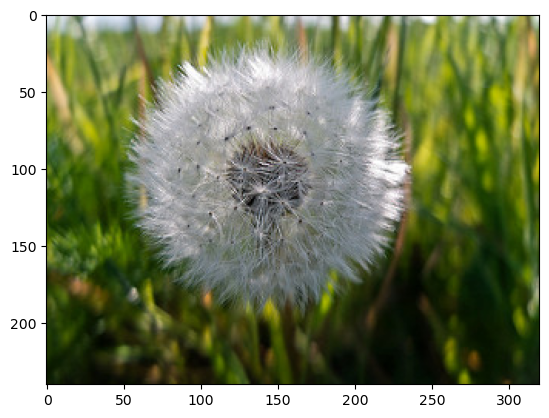

In [22]:
src1 = getImageSource(True, 3, 5)
plt.imshow(src1)

In [23]:
src1.shape

(240, 320, 3)

In [25]:
countImagesByFolder(True)

634 in '../recursos/2 Flores/train/Girasol'
884 in '../recursos/2 Flores/train/Tulipán'
684 in '../recursos/2 Flores/train/Rosa'
952 in '../recursos/2 Flores/train/Diente de León'
669 in '../recursos/2 Flores/train/Margarita'


In [26]:
countImagesByFolder(False)

100 in '../recursos/2 Flores/test/Girasol'
100 in '../recursos/2 Flores/test/Tulipán'
100 in '../recursos/2 Flores/test/Rosa'
100 in '../recursos/2 Flores/test/Diente de León'
100 in '../recursos/2 Flores/test/Margarita'


## 3.2 Calcular dimensiones promedio

In [76]:
# ['Girasol', 'Tulipán', 'Rosa', 'Diente de León', 'Margarita']
# Dimensiones diente de leon
dims = getDimensions(True, 3)
listShape(dims)

(952, 952)


/home/hisham/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


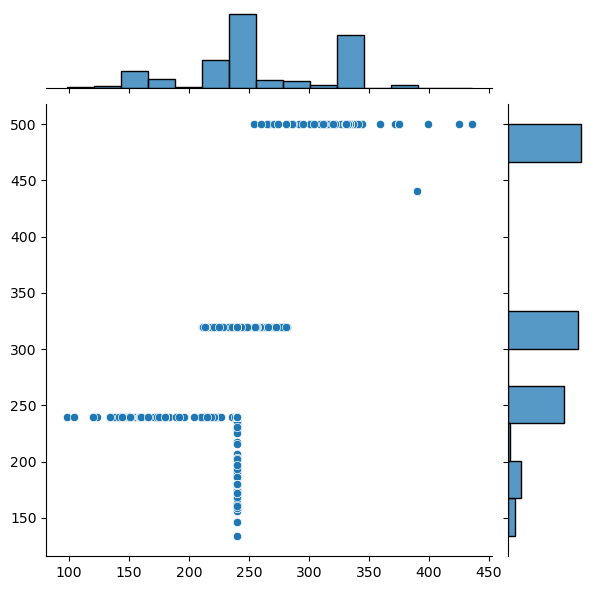

In [77]:
sns.jointplot(dims[0], dims[1])

In [78]:
print( np.mean(dims[0]) )
print( np.mean(dims[1]) )

255.85294117647058
344.24789915966386


In [82]:
# ['Girasol', 'Tulipán', 'Rosa', 'Diente de León', 'Margarita']
# Dimensiones diente de leon
d = {
    "gira": getDimensions(True, 0),
    "tuli": getDimensions(True, 1),
    "rosa": getDimensions(True, 2),
    "leon": getDimensions(True, 3),
    "marg": getDimensions(True, 4),
}

(884, 884)


/home/hisham/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


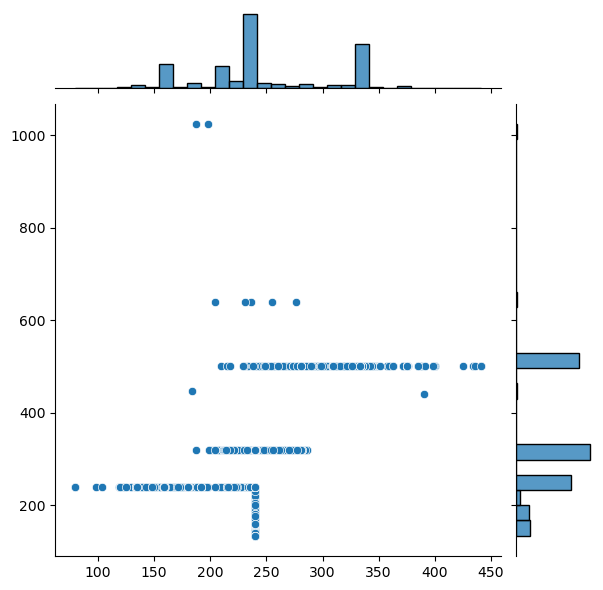

In [83]:
listShape(d['tuli'])
x = d["gira"][0] + d["tuli"][0] + d["rosa"][0] + d["leon"][0] + d["marg"][0]
y = d["gira"][1] + d["tuli"][1] + d["rosa"][1] + d["leon"][1] + d["marg"][1]
sns.jointplot(x, y)

In [84]:
np.mean(x)

248.3693434475543

In [85]:
np.mean(y)

332.7849856133926

In [86]:
# Crear un shape customizado
# para setearlo a futuro en algun array de numpy
customShape = (250, 335, 3)

## 3.3 Manipulación de imágenes

In [87]:
# Es buena idea manipular las imágenes con rotaciones, reescalados, desplazamientos,...
# para hacer más robusto al modelo con más imágenes (artificiales) que nuestros
# datasets no contienen --> **ImageDataGenerator**

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [88]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.preprocessing.image:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, interpolation_order=1, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |  Deprecated: `tf.keras.preprocessing.image.ImageDataGenerator` is not
 |  recommended for new code. Prefer loading images with
 |  `tf.keras.utils.image_dataset_from_directory` and transforming the output
 |  `tf.data.Dataset` with preprocessing layers. For more informati

In [91]:
imageGenerator = ImageDataGenerator(
    rotation_range=20, # Este rango de rotación lo elegimos dependiendo del caso
    width_shift_range=0.10, # Desplazamiento horizontal -5% --- +5%
    height_shift_range=0.10, # Desplazamiento vertical -5% --- +5%
    rescale=1/255, # Reescalar la imagen para normalizarla entre 0-1
    shear_range=0.10, # Distorción a partir de un eje - 10%
    zoom_range=0.10,
    horizontal_flip=True, # Espejo horizontal
    fill_mode="nearest" # Rellenar pixeles vacíos con el valor más cercano
)
#Ejemplos de manipulación de imágenes:
# https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

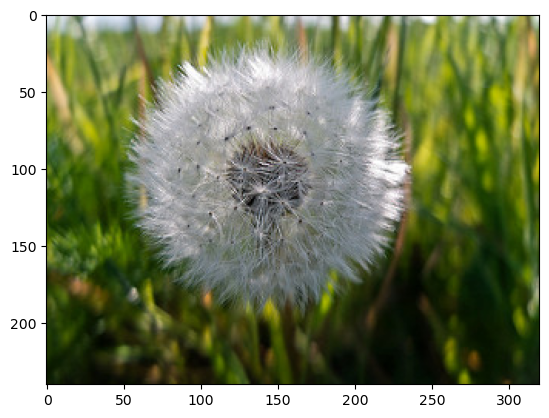

In [90]:
plt.imshow(src1)

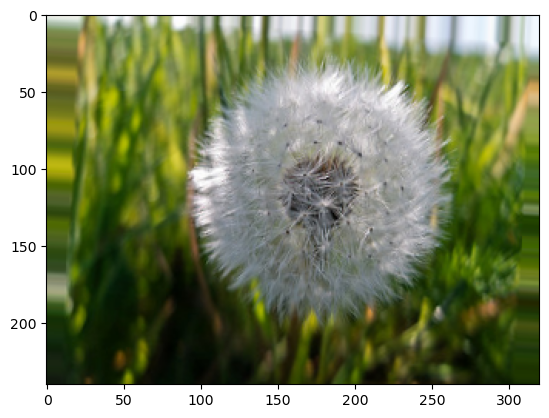

In [96]:
randomImage = imageGenerator.random_transform(src1)
plt.imshow( randomImage )

In [97]:
# Para poder generar imágenes manipuladas desde un directorio, debe haber una carpeta por clase de imágenes:
# * Carpeta de imágenes
#     * Clase 1
#         * 0.jpg
#         * 1.jpg
#         * ...
#     * Clase 2
#         * 0.jpg
#         * 1.jpg
#         * ...
#     * ...
#     * Clase n

In [98]:
imageGenerator.flow_from_directory(trainPath)

Found 3823 images belonging to 5 classes.


In [99]:
imageGenerator.flow_from_directory(testPath)

Found 500 images belonging to 5 classes.


In [100]:
batchSize = 16 # 1 por cada GB de RAM

In [101]:
train_image_generator = imageGenerator.flow_from_directory(
    trainPath,
    target_size=customShape[:2], # Nuestro propio shape
    color_mode="rgb",
    batch_size=batchSize,
    class_mode="categorical" # En caso de clasif binaria = "binary"
)

Found 3823 images belonging to 5 classes.


In [102]:
test_image_generator = imageGenerator.flow_from_directory(
    testPath,
    target_size=customShape[:2], # Nuestro propio shape
    color_mode="rgb",
    batch_size=batchSize,
    class_mode="categorical", # En caso de clasif binaria = "binary"
    shuffle=False # No barajar las imágenes
)

Found 500 images belonging to 5 classes.


In [103]:
train_image_generator.class_indices

{'Diente de León': 0, 'Girasol': 1, 'Margarita': 2, 'Rosa': 3, 'Tulipán': 4}

# 4. Creación del modelo

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [105]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

# CAPA CONVOLUCIONAL
model.add( Conv2D(filters=32, kernel_size=(3, 3), input_shape=customShape, activation="relu") )
model.add( MaxPooling2D(pool_size=(2, 2)) )

# CAPA CONVOLUCIONAL
model.add( Conv2D(filters=64, kernel_size=(3, 3), input_shape=customShape, activation="relu") )
model.add( MaxPooling2D(pool_size=(2, 2)) )

# CAPA CONVOLUCIONAL
model.add( Conv2D(filters=64, kernel_size=(3, 3), input_shape=customShape, activation="relu") )
model.add( MaxPooling2D(pool_size=(2, 2)) )

# CAPA FLATTEN # Convierte imagenes en un array
# 250x335 = 83750
model.add( Flatten() )

# CAPA DENSE
model.add( Dense(128) )
model.add( Activation("relu") )

# CAPA DROPOUT
model.add( Dropout(0.5) )

# CAPA FINAL DE CLASIFICACIÓN
model.add( Dense(5, activation="softmax") )

# COMPILAR
model.compile(
    loss="categorical_crossentropy", # binary_crossentropy en caso de clasificación binaria
    optimizer="adam",
    metrics=["accuracy"]
)

2023-03-26 20:51:38.070756: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-26 20:51:38.070978: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-26 20:51:38.071040: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-03-26 20:51:38.071083: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-03-26 20:51:38.071117: W tensorflow/c

In [106]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 333, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 166, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 164, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 82, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 80, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 40, 64)       0

# 5. Entrenamiento del modelo

In [107]:
from tensorflow.keras.callbacks import EarlyStopping

In [108]:
earlyStopping = EarlyStopping(monitor="val_loss", patience=2)

In [109]:
import warnings
warnings.filterwarnings("ignore")

In [110]:
results = model.fit_generator(
    train_image_generator,
    epochs=5,
    validation_data=test_image_generator,
    callbacks=[earlyStopping]
)

Epoch 1/5
239/239 [==============================] - 359s 1s/step - loss: 1.4310 - accuracy: 0.3976 - val_loss: 1.1974 - val_accuracy: 0.5140
Epoch 2/5
239/239 [==============================] - 325s 1s/step - loss: 1.1822 - accuracy: 0.5205 - val_loss: 1.0256 - val_accuracy: 0.6000
Epoch 3/5
239/239 [==============================] - 299s 1s/step - loss: 1.0661 - accuracy: 0.5909 - val_loss: 1.0075 - val_accuracy: 0.5820
Epoch 4/5
239/239 [==============================] - 300s 1s/step - loss: 1.0105 - accuracy: 0.6150 - val_loss: 0.9032 - val_accuracy: 0.6520
Epoch 5/5
239/239 [==============================] - 298s 1s/step - loss: 0.9576 - accuracy: 0.6307 - val_loss: 0.9212 - val_accuracy: 0.6420


In [111]:
from tensorflow.keras.models import load_model

In [112]:
model.save("./models/hisham_model_predecir_flores.h5")

<AxesSubplot:>

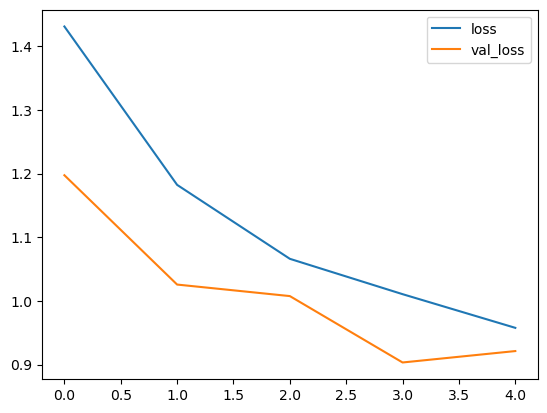

In [113]:
losses = pd.DataFrame(model.history.history)
losses[['loss', 'val_loss']].plot()

<AxesSubplot:>

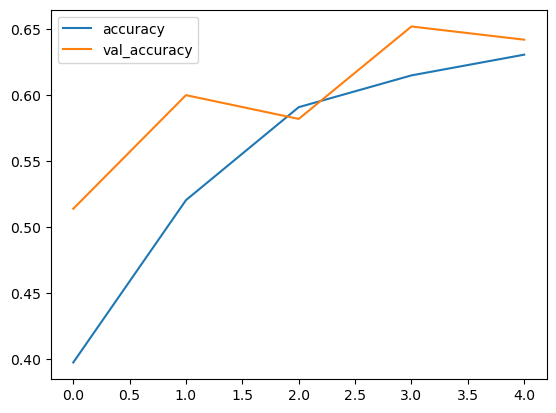

In [114]:
losses[['accuracy', 'val_accuracy']].plot()

# 6. Evaluación del modelo

## 6.1 Predicción sobre el conjunto de test

In [115]:
model.metrics_names

['loss', 'accuracy']

In [116]:
model.evaluate_generator(test_image_generator)

[0.9270813465118408, 0.6420000195503235]

In [118]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras
prediction_probabilities = model.predict_generator(test_image_generator)

In [119]:
prediction_probabilities

array([[8.5540998e-01, 1.0250060e-02, 6.5349057e-02, 3.4387074e-02,
        3.4603756e-02],
       [6.3012284e-01, 3.6153141e-03, 2.8126225e-01, 4.6411857e-02,
        3.8587842e-02],
       [9.6796197e-01, 6.2044302e-04, 2.2198288e-02, 5.3104013e-03,
        3.9089737e-03],
       ...,
       [3.9658112e-16, 1.6614235e-13, 8.2404056e-11, 2.4207837e-03,
        9.9757928e-01],
       [2.2362418e-07, 1.2391488e-05, 7.8979654e-05, 6.6027969e-02,
        9.3388045e-01],
       [8.8852045e-07, 2.9651703e-05, 4.3306292e-05, 3.2665197e-02,
        9.6726090e-01]], dtype=float32)

In [120]:
test_image_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [124]:
predictions = np.argmax(model.predict(test_image_generator), axis=-1)

32/32 [==============================] - 13s 399ms/step


In [125]:
predictions

array([0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 4, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 4, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 3, 2, 0, 1,
       4, 0, 0, 0, 2, 4, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 4, 4, 1, 0, 1, 0,
       1, 0, 4, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4,
       4, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4,
       1, 0, 1, 1, 1, 1, 2, 4, 1, 0, 1, 1, 1, 1, 1, 0, 4, 1, 1, 1, 1, 1,
       1, 1, 4, 1, 4, 0, 1, 1, 1, 1, 4, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 4, 3, 2, 2, 4, 2, 0, 2, 4, 4, 4, 2, 2, 3, 2, 4, 2, 3, 4,
       0, 4, 4, 2, 2, 2, 3, 2, 0, 3, 0, 4, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 1, 0, 0, 2, 2, 2, 1, 0, 2, 2, 0, 2, 0, 2, 4, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 4, 2, 0, 4, 2, 2, 1, 0, 4, 4, 2,
       4, 4, 2, 0, 0, 4, 2, 2, 0, 2, 4, 0, 2, 2, 4,

In [126]:
from sklearn.metrics import classification_report, confusion_matrix

In [127]:
print( classification_report(test_image_generator.classes, predictions) )

              precision    recall  f1-score   support

           0       0.59      0.66      0.63       100
           1       0.73      0.76      0.75       100
           2       0.80      0.52      0.63       100
           3       0.68      0.39      0.50       100
           4       0.50      0.81      0.62       100

    accuracy                           0.63       500
   macro avg       0.66      0.63      0.62       500
weighted avg       0.66      0.63      0.62       500



In [130]:
matrix = confusion_matrix(test_image_generator.classes, predictions)
matrix

array([[66, 21,  4,  1,  8],
       [11, 76,  2,  0, 11],
       [20,  3, 52,  6, 19],
       [10,  1,  6, 39, 44],
       [ 4,  3,  1, 11, 81]])

<AxesSubplot:>

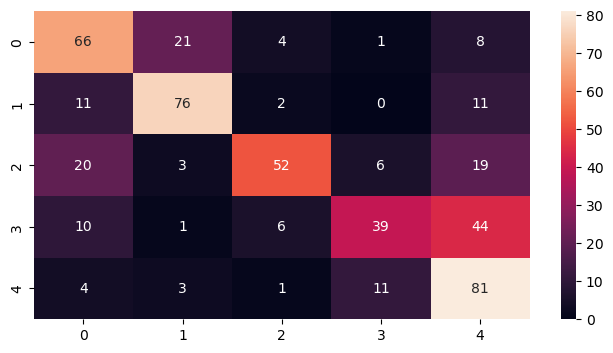

In [131]:
plt.figure(figsize=(8,4))
sns.heatmap( matrix, annot=True )

## 6.2 Predicciones para una nueva imagen

In [165]:
from tensorflow.keras.preprocessing import image
import tensorflow as tf

In [198]:
def loadImageArray(train, numFolder, numImage):
    nuevaImagen = image.load_img( getImagePath(train, numFolder, numImage), target_size=customShape )
    array = image.img_to_array(nuevaImagen)
    print(array.shape)
    print( type(nuevaImagen) )
    plt.imshow(nuevaImagen)
    return nuevaImagen, array

(250, 335, 3)
<class 'PIL.Image.Image'>


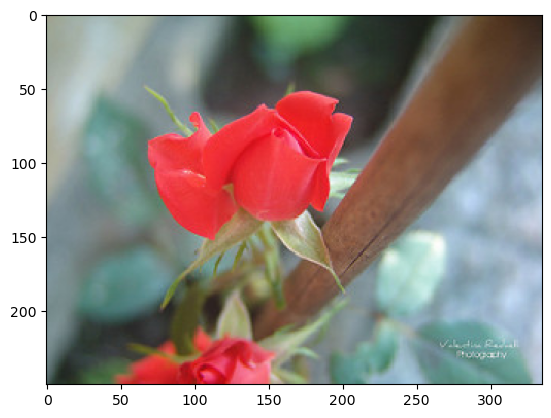

In [199]:
nuevaImagen, nuevaImagenArray = loadImageArray(True, 2, 52)

In [200]:
nuevaImagenArray = np.expand_dims( nuevaImagenArray, axis=0 )

In [201]:
nuevaImagenArray.shape

(1, 250, 335, 3)

In [204]:
prediction = model.predict(nuevaImagenArray)

1/1 [==============================] - 0s 32ms/step


In [211]:
def showCategory(pred):
    cat = 0
    for i, v in enumerate(pred[0]):
        if int(v) == 1:
            cat = i;
            break
    for category, num in test_image_generator.class_indices.items():
        if num == cat:
            return category
    return ''

In [212]:
showCategory(prediction)

'Rosa'